In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
df = pd.read_csv("Unemployment in India.csv")
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
df.columns = ['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
              'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Region']

df['Date'] = pd.to_datetime(df['Date'])
df.head(10)



,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,2019-10-31,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,2019-11-30,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,2019-12-31,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,2020-01-31,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,2020-02-29,Monthly,5.91,11723617.0,42.83,Rural


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   State                                    740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Region                                   740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB


In [9]:
df.isnull().sum()

State                                      28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Region                                     28
dtype: int64

In [10]:
df.dropna(inplace=True)


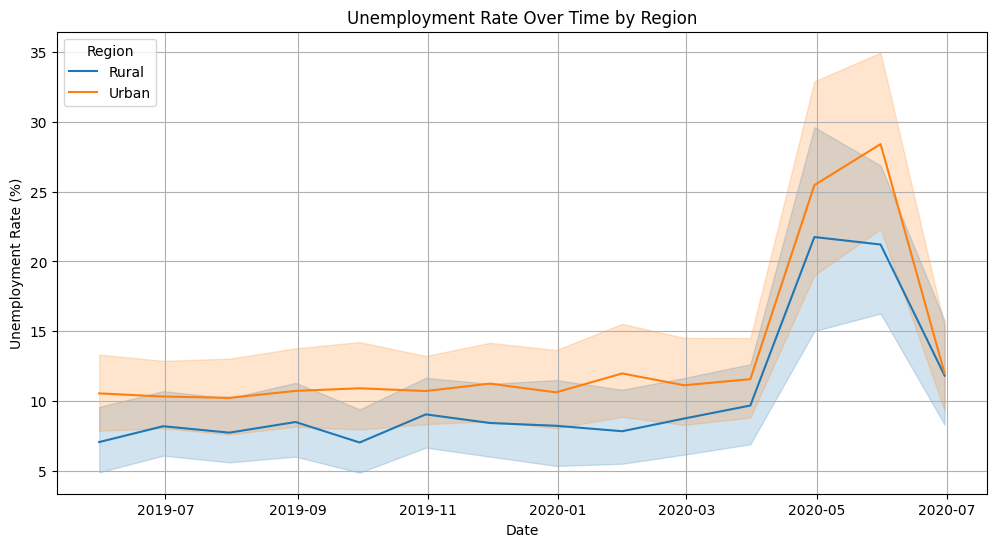

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


In [14]:
covid_start = pd.to_datetime("2020-03-01")

pre_covid = df[df['Date'] < covid_start]
post_covid = df[df['Date'] >= covid_start]

pre_mean = pre_covid['Estimated Unemployment Rate (%)'].mean()
post_mean = post_covid['Estimated Unemployment Rate (%)'].mean()

print(f"Average Unemployment Rate Before COVID: {pre_mean:.2f}%")
print(f"Average Unemployment Rate After COVID: {post_mean:.2f}%")


Average Unemployment Rate Before COVID: 9.51%
Average Unemployment Rate After COVID: 17.77%


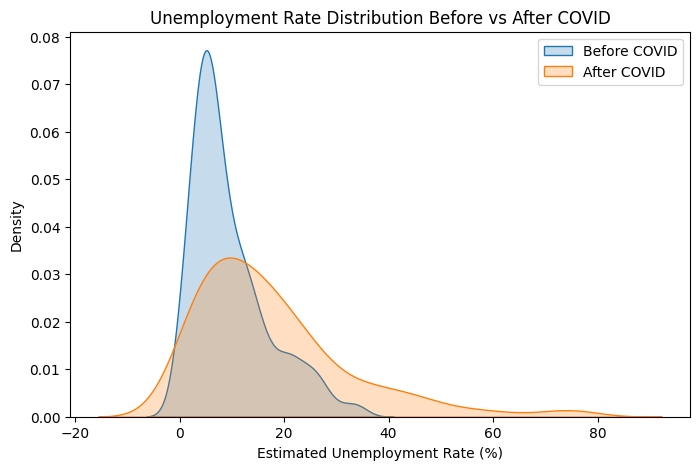

In [16]:
plt.figure(figsize=(8, 5))
sns.kdeplot(pre_covid['Estimated Unemployment Rate (%)'], label="Before COVID", fill=True)
sns.kdeplot(post_covid['Estimated Unemployment Rate (%)'], label="After COVID", fill=True)
plt.title("Unemployment Rate Distribution Before vs After COVID")
plt.legend()
plt.show()


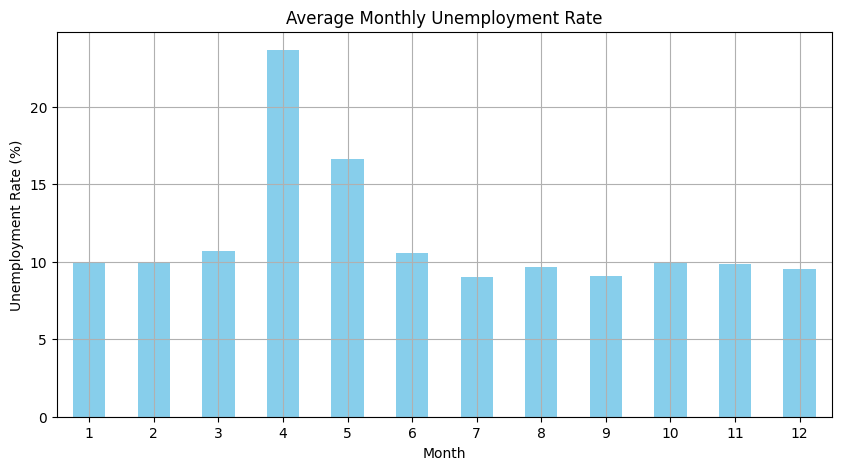

In [17]:
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Unemployment Rate')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


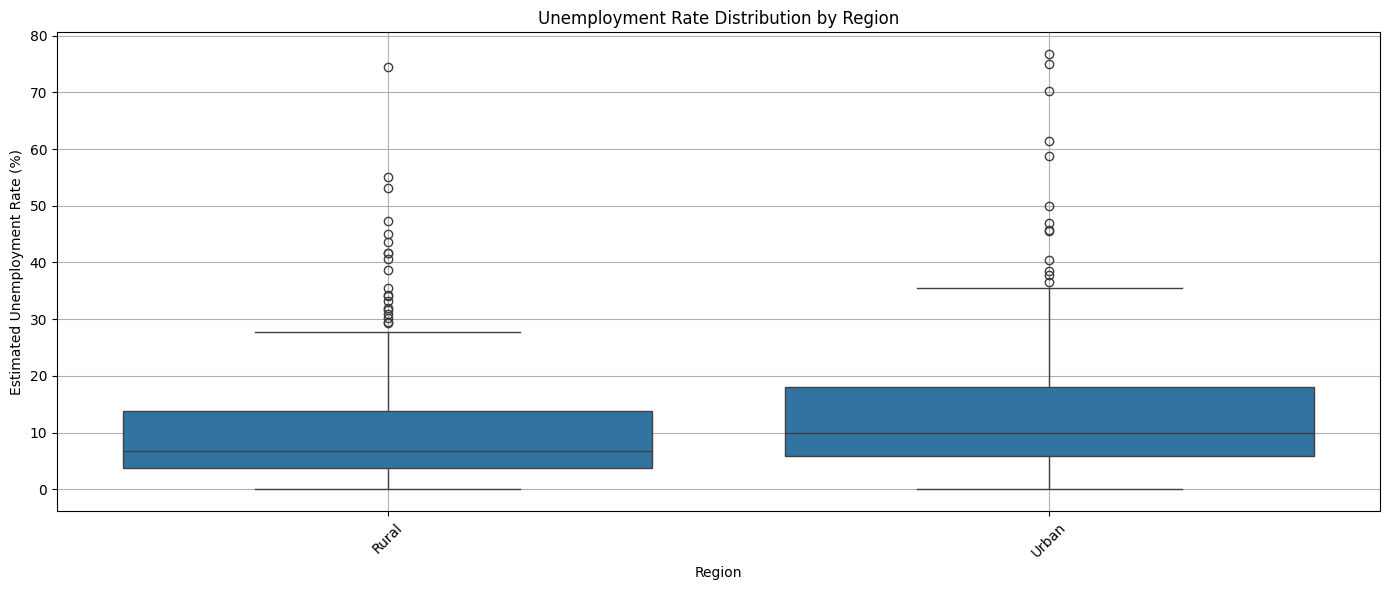

In [27]:
import plotly.express as px

latest_date = df['Date'].max()
latest_data = df[df['Date'] == latest_date]

fig = px.choropleth(latest_data,
                    geojson="https://raw.githubusercontent.com/datameet/maps/master/States/Admin2.geojson",
                    featureidkey='properties.st_nm',
                    locations='State',
                    color='Estimated Unemployment Rate (%)',
                    color_continuous_scale='Reds',
                    title=f'Unemployment Rate by State on {latest_date.date()}')

fig.update_geos(fitbounds="locations", visible=False)
fig.show()
